In [1]:
import astropy
from astropy import io
from astropy.io import fits
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fits_data = astropy.io.fits.open('asu.fit')
zcosmos = fits_data[1].data

In [3]:
name_info = fits_data[1].columns
print([i.name for i in name_info])
zcosmos_names = [i.name for i in name_info]

['zCOSMOS', 'RAJ2000', 'DEJ2000', 'z', 'CClass', 'Imag', 'Mask']


In [4]:
useful_columns_zcosmos_data = [zcosmos_names[3], zcosmos_names[5]]

In [5]:
print(useful_columns_zcosmos_data)

['z', 'Imag']


In [6]:
z = useful_columns_zcosmos_data[0]
zcosmos_redshift = zcosmos[z]
print(zcosmos_redshift)

[ 0.8798  0.6972  0.9069 ...,  0.7077  0.6776  0.8266]


In [7]:
fits_data2 = astropy.io.fits.open('asu2.fit')
cosmos = fits_data2[1].data

In [8]:
name_info2 = fits_data2[1].columns
print([i.name for i in name_info2])
cosmos_names = [i.name for i in name_info2]

['COSMOS', 'RAJ2000', 'DEJ2000', 'istar', 'imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'NB816', 'zphot']


In [9]:
useful_columns_cosmos_range = list(range(4, 14)) + [15]
useful_columns_cosmos_data = [cosmos_names[i] for i in useful_columns_cosmos_range]
print(useful_columns_cosmos_data)

['imagA', 'n_imagA', 'umag', 'Bmag', 'Vmag', 'gmag', 'rmag', 'imag', 'zmag', 'Kmag', 'zphot']


In [10]:
zphot = useful_columns_cosmos_data[10]
cosmos_redshift = cosmos[zphot]
print(cosmos_redshift)

[ 1.34  0.76  0.4  ...,  0.07  0.67  1.26]


In [11]:
print(len(zcosmos))
print(len(cosmos))

10644
438226


In [12]:
zcosmos_df = pd.DataFrame(fits_data[1].data)
zcosmos_df.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


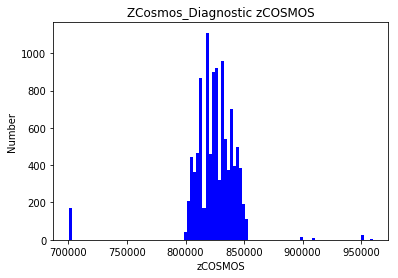

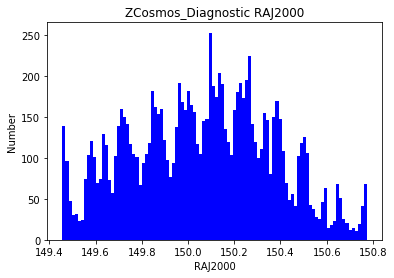

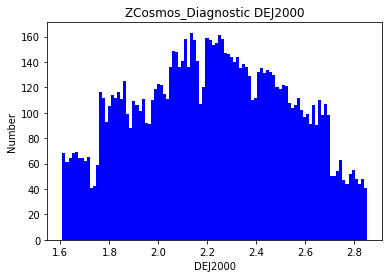

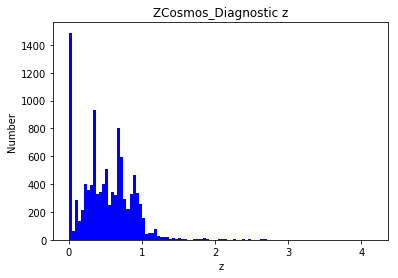

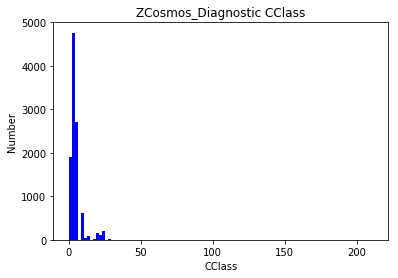

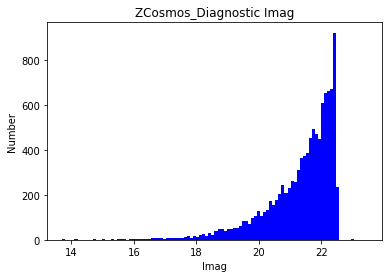

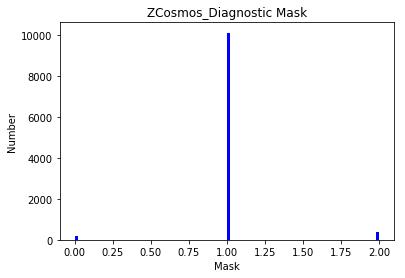

In [13]:
##diagnostic to find abnormal placeholder values for removal
for i in zcosmos_df:
    plt.hist(zcosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("ZCosmos_Diagnostic" + " " + i)
    plt.savefig("ZCosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [14]:
##remove abnormal placeholder values
zcosmos_df_part2 = zcosmos_df.query('z<999')
zcosmos_df_filtered = zcosmos_df_part2.query('z>0.000')
zcosmos_df_filtered.head()

,zCOSMOS,RAJ2000,DEJ2000,z,CClass,Imag,Mask
0,700137,150.502792,1.877646,0.8798,1.5,22.27,1
1,700142,150.395737,1.837453,0.6972,3.5,21.96,1
2,700178,150.305008,1.876265,0.9069,9.5,22.24,1
3,700189,150.308258,1.916484,0.8964,2.5,21.84,1
4,700210,150.210480,1.828116,0.2835,1.5,22.14,1


In [15]:
cosmos_df = pd.DataFrame(fits_data2[1].data)
cosmos_df.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
3,26433,150.73299,1.62607,0.60,24.8256,1,25.1141,24.8163,24.7607,24.7935,24.9016,24.7355,24.3860,0.0000,24.6030,0.01
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34


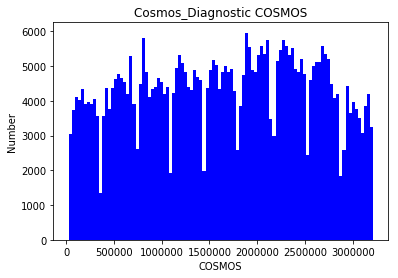

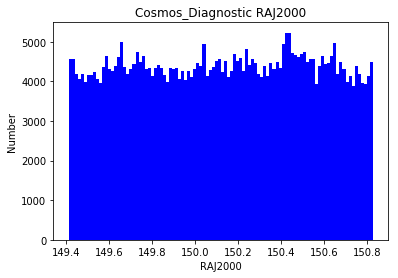

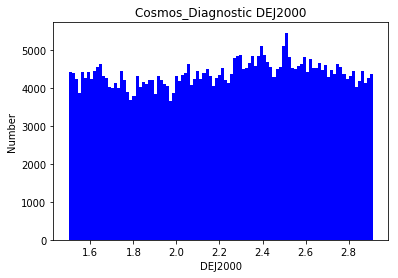

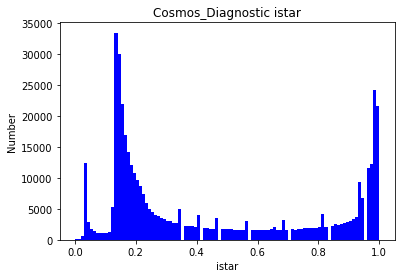

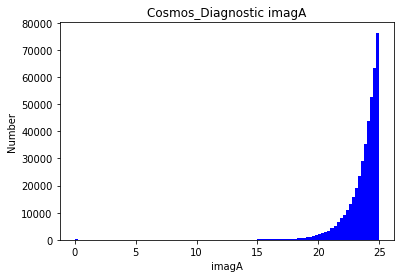

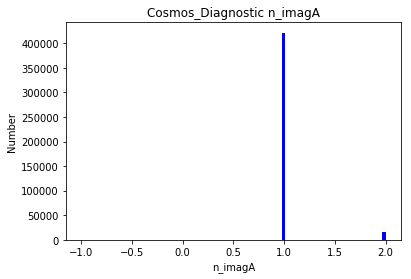

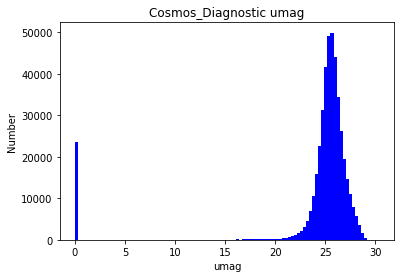

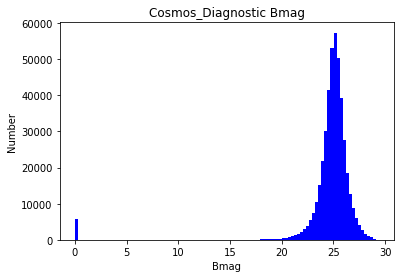

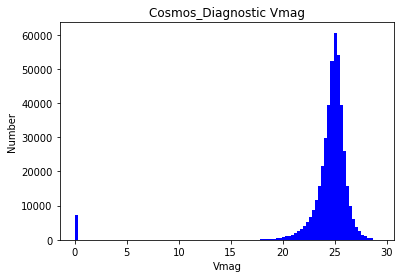

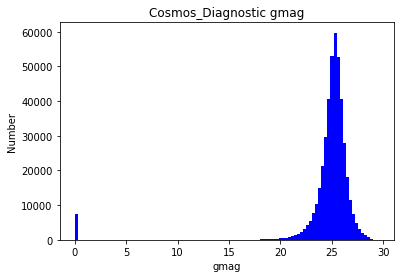

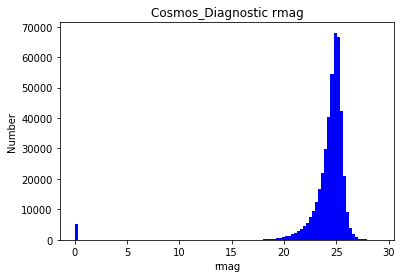

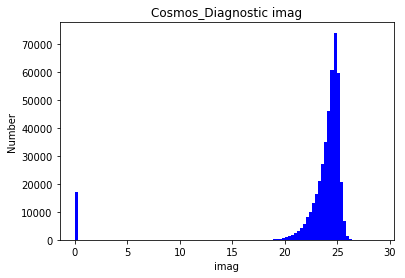

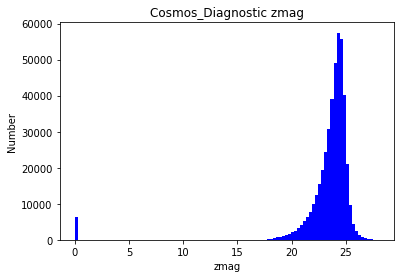

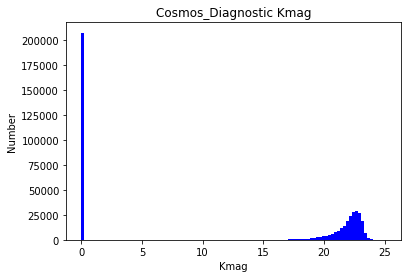

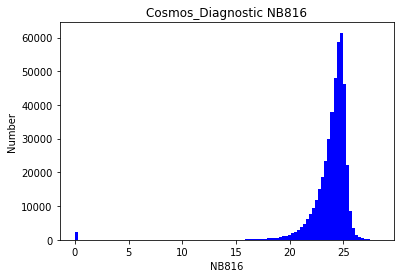

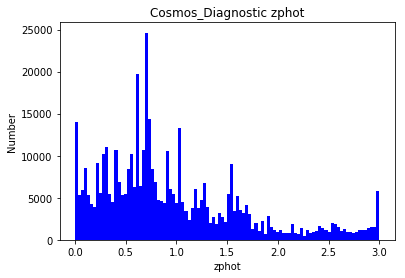

In [16]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_df:
    plt.hist(cosmos_df[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_Diagnostic" + " " + i)
    plt.savefig("Cosmos_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [17]:
#removal of abnormal placeholder values
cosmos_df_part1 = cosmos_df.query('zphot<999')
cosmos_df_part2 = cosmos_df_part1.query('umag>0.00')
cosmos_df_part3 = cosmos_df_part2.query('Bmag>0.00')
cosmos_df_part4 = cosmos_df_part3.query('Vmag>0.00')
cosmos_df_part5 = cosmos_df_part4.query('gmag>0.00')
cosmos_df_part6 = cosmos_df_part5.query('rmag>0.00')
##cosmos_df_part7 = cosmos_df_part6.query('imag>0.00')
##it gives me an error for the imag, not sure why
cosmos_df_part7 = cosmos_df_part6.query('zmag>0.00')
cosmos_df_part8 = cosmos_df_part7.query('Kmag>0.00')
cosmos_df_filtered = cosmos_df_part8.query('zphot>0.000')
cosmos_df_filtered.head()

,COSMOS,RAJ2000,DEJ2000,istar,imagA,n_imagA,umag,Bmag,Vmag,gmag,rmag,imag,zmag,Kmag,NB816,zphot
0,26429,150.74847,1.62620,0.40,24.1249,1,25.4934,24.9912,24.9563,25.2105,24.7035,24.2957,23.5802,23.1113,24.2467,1.34
1,26430,150.78005,1.62618,0.14,23.7194,1,25.0668,24.5890,24.6187,24.8700,24.4337,24.0031,23.4544,22.9926,23.9513,0.76
2,26431,150.79328,1.62584,0.80,23.5582,1,25.1767,24.6644,24.1307,24.6667,23.9864,23.6708,23.2240,22.4682,23.5978,0.40
4,26436,150.73218,1.62422,0.16,23.7084,1,24.9316,24.5043,24.0938,24.5801,23.8355,23.9121,23.5610,22.0594,23.8575,0.34
5,26437,150.73287,1.62514,0.52,20.5785,2,21.0047,20.6726,20.5957,20.6621,20.8121,0.0000,20.4596,20.4376,20.5521,0.01


In [18]:
##cross match of cosmos and zcosmos from http://cdsxmatch.u-strasbg.fr/xmatch
cosmos_and_zcosmos_cross_match1 = pd.read_csv('cross_match2.csv')

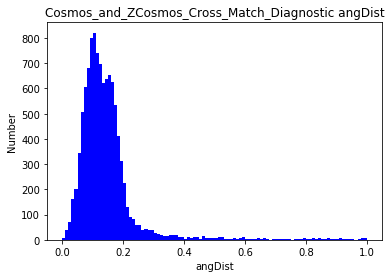

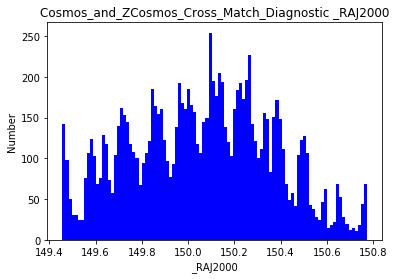

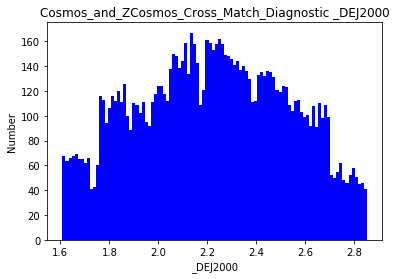

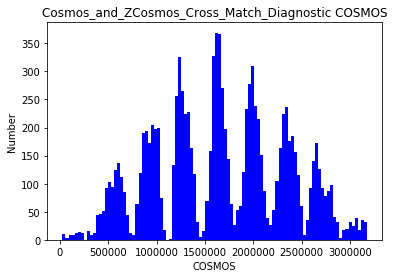

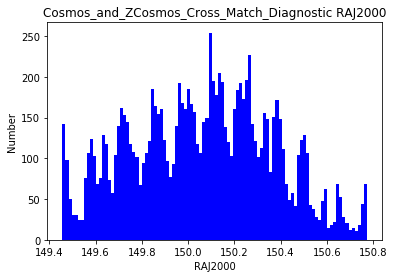

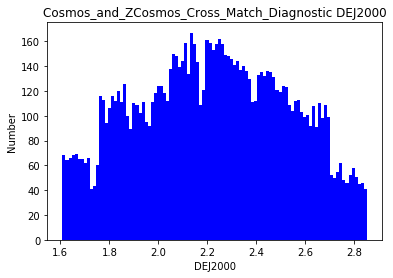

ValueError: max must be larger than min in range parameter.

In [19]:
##diagnostic to find abnormal placeholder values for removal
for i in cosmos_and_zcosmos_cross_match1.columns:
    plt.hist(cosmos_and_zcosmos_cross_match1[i], color='blue', linewidth=5, bins=100)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i)
    plt.savefig("Cosmos_and_ZCosmos_Cross_Match_Diagnostic" + " " + i + " " + "Plot.png")
    plt.show()

In [20]:
#removal of abnormal placeholder values
cosmos_and_zcosmos_cross_match2 = cosmos_and_zcosmos_cross_match1.query('zphot<999')
cosmos_and_zcosmos_cross_match3 = cosmos_and_zcosmos_cross_match2.query('Bmag>0.00')
cosmos_and_zcosmos_cross_match4 = cosmos_and_zcosmos_cross_match3.query('Vmag>0.00')
cosmos_and_zcosmos_cross_match5 = cosmos_and_zcosmos_cross_match4.query('gmag>0.00')
cosmos_and_zcosmos_cross_match6 = cosmos_and_zcosmos_cross_match5.query('rmag>0.00')
##cosmos_and_zcosmos_cross_match8 = cosmos_and_zcosmos_cross_match7.query('imag>0.00')
##it gives me an error for the imag, not sure why
cosmos_and_zcosmos_cross_match7 = cosmos_and_zcosmos_cross_match6.query('zmag>0.00')
cosmos_and_zcosmos_cross_match = cosmos_and_zcosmos_cross_match7.query('zphot>0.000')

In [22]:
##Find duplicates in cosmos_and_zcosmos_cross_match
total = 0
for i in cosmos_and_zcosmos_cross_match:
    for line in cosmos_and_zcosmos_cross_match:
        finded = line.find(i)
        if finded != -1 and finded != 0:
            total += 1
            if total > 1: 
                print(i)
##The only duplicates it shows me are ones I knew would be there (columns), so it seems there is nothing more for me to do about this. 

RAJ2000
RAJ2000
DEJ2000
DEJ2000
imagA
RAJ2000.1
DEJ2000.1


In [23]:
cosmos_and_zcosmos_cross_match_useful_columns = ['COSMOS', 'imagA', 'n_imagA', 'Bmag', 'Vmag', 'gmag', 'rmag', 'zmag', 'zphot', 'zCOSMOS', 'z', 'CClass', 'Imag']

In [24]:
##here is the document I actually need
cosmos_and_zcosmos_cross_match[cosmos_and_zcosmos_cross_match_useful_columns]

,COSMOS,imagA,n_imagA,Bmag,Vmag,gmag,rmag,zmag,zphot,zCOSMOS,z,CClass,Imag
0,2710778,20.4085,1,22.2510,21.3947,22.1372,21.1875,20.6026,0.26,845680,0.3128,3.5,20.43
1,1603077,20.0348,1,22.1842,21.7297,22.2322,21.5123,21.0768,0.22,824999,0.2164,4.5,21.32
2,1242468,21.4079,1,22.6817,22.2864,22.7020,22.0964,21.5773,0.03,818595,0.0000,4.4,21.98
4,1671285,20.3302,1,23.1409,22.2112,23.1003,21.5952,20.6163,0.36,825318,0.4789,4.5,20.51
5,2710822,21.4706,1,24.2872,23.2933,24.2180,22.5126,21.3354,0.48,846003,0.5174,2.5,21.48
6,1320926,21.3904,1,25.2338,23.6471,24.9195,22.9959,21.1997,0.78,819527,0.7443,3.5,21.37
7,1242516,21.9709,1,24.0139,23.3971,24.0099,22.9684,21.5341,0.85,818027,0.9325,2.5,21.83
8,1242517,20.7033,1,23.3172,22.2866,23.1698,21.5913,20.7006,0.40,818065,0.3712,4.5,20.75
9,879829,19.7687,1,21.7659,20.8016,21.5993,20.5308,19.6853,0.15,811072,0.1682,3.5,19.73
10,1671315,19.8531,1,22.5464,21.3385,22.3688,20.7620,19.8007,0.31,825868,0.3115,2.5,19.80


In [25]:
##Get only the points in cosmos that arent also in zcosmos.
cosmos_df_not_in_zcosmos = cosmos_df_filtered[~cosmos_df_filtered['COSMOS'].isin(cosmos_and_zcosmos_cross_match['COSMOS'])]
print(len(cosmos_df_not_in_zcosmos))

202974


In [26]:
##Get only the points in zcosmos that arent also in cosmos.
zcosmos_df_not_in_cosmos = zcosmos_df_filtered[~zcosmos_df_filtered['zCOSMOS'].isin(cosmos_and_zcosmos_cross_match['zCOSMOS'])]
print(len(zcosmos_df_not_in_cosmos))

64


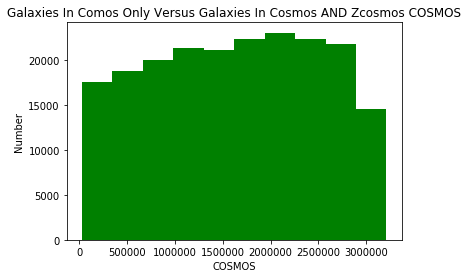

ValueError: max must be larger than min in range parameter.

In [27]:
##Comparing the magnitudes/redshifts of galaxies in both cosmos and zcosmos and galaxies just in cosmos
for i in cosmos_and_zcosmos_cross_match_useful_columns:
    plt.hist(cosmos_and_zcosmos_cross_match[i], color='blue', linewidth=5)
    plt.hist(cosmos_df_not_in_zcosmos[i], color='green', linewidth=5)
    plt.xlabel(i)
    plt.ylabel("Number")
    plt.title("Galaxies In Comos Only" + " " + "Versus" + " " + "Galaxies In Cosmos AND Zcosmos" + " " + i)
    plt.savefig("Galaxies In Comos Only" + " " + "Versus" + "Galaxies In Cosmos AND Zcosmos" + " " + i + " " + "Plot.png")
    plt.show()